This notebook contains my experiments with the Darts package.

In [ ]:
!pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.0/592.0 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.6/715.6 KB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 370.2/370.2 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.

In [ ]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

from darts import TimeSeries

plt.rcParams["figure.figsize"] = (20, 10)
mpl.rcParams['lines.linewidth'] = 0.1

Dataset: https://www.notion.so/Exploratory-Data-Analysis-EDA-7ced94927f7f473bad7a651d24828285?pvs=4#b6be005c2b2640c0b89903023b28288b (CPCB dataset with AQI column)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/omdena-airquality/csv_aqi/

BandraKurlaComplexMumbaiIITM.csv
BandraMumbaiMPCB.csv
BorivaliEastMumbaiIITM.csv
BorivaliEastMumbaiMPCB.csv
ChakalaAndheriEastMumbaiIITM.csv
ChhatrapatiShivajiIntlAirportT2MumbaiMPCB.csv
ColabaMumbaiMPCB.csv
DeonarMumbaiIITM.csv
KandivaliEastMumbaiMPCB.csv
KhindipadaBhandupWestMumbaiIITM.csv
KurlaMumbaiMPCB.csv
MaladWestMumbaiIITM.csv
MazgaonMumbaiIITM.csv
MulundWestMumbaiMPCB.csv
NavyNagarColabaMumbaiIITM.csv
PowaiMumbaiMPCB.csv
SiddharthNagarWorliMumbaiIITM.csv
SionMumbaiMPCB.csv
VasaiWestMumbaiMPCB.csv
VileParleWestMumbaiMPCB.csv
WorliMumbaiMPCB.csv


In [ ]:
directory = "/content/drive/MyDrive/omdena-airquality/csv_aqi/"
all_files = os.listdir(directory)
csv_files = [file for file in all_files if file.endswith(".csv")]
csv_files = sorted(csv_files)
print(csv_files)

['BandraKurlaComplexMumbaiIITM.csv', 'BandraMumbaiMPCB.csv', 'BorivaliEastMumbaiIITM.csv', 'BorivaliEastMumbaiMPCB.csv', 'ChakalaAndheriEastMumbaiIITM.csv', 'ChhatrapatiShivajiIntlAirportT2MumbaiMPCB.csv', 'ColabaMumbaiMPCB.csv', 'DeonarMumbaiIITM.csv', 'KandivaliEastMumbaiMPCB.csv', 'KhindipadaBhandupWestMumbaiIITM.csv', 'KurlaMumbaiMPCB.csv', 'MaladWestMumbaiIITM.csv', 'MazgaonMumbaiIITM.csv', 'MulundWestMumbaiMPCB.csv', 'NavyNagarColabaMumbaiIITM.csv', 'PowaiMumbaiMPCB.csv', 'SiddharthNagarWorliMumbaiIITM.csv', 'SionMumbaiMPCB.csv', 'VasaiWestMumbaiMPCB.csv', 'VileParleWestMumbaiMPCB.csv', 'WorliMumbaiMPCB.csv']


Load files and clean them.

In [ ]:
df_list = []
station_names = []
for filename in csv_files: 
    print(f'Loading {filename}')
    df_temp = pd.read_csv(os.path.join(directory, filename), index_col=0)
    df_list.append(df_temp)
    name, _ = os.path.splitext(filename)
    station_names.append(name)

data_dict = dict(zip(station_names, df_list))

Loading BandraKurlaComplexMumbaiIITM.csv
Loading BandraMumbaiMPCB.csv


<ipython-input-10-537651ad3edb>:5: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(os.path.join(directory, filename), index_col=0)


Loading BorivaliEastMumbaiIITM.csv
Loading BorivaliEastMumbaiMPCB.csv
Loading ChakalaAndheriEastMumbaiIITM.csv
Loading ChhatrapatiShivajiIntlAirportT2MumbaiMPCB.csv
Loading ColabaMumbaiMPCB.csv
Loading DeonarMumbaiIITM.csv
Loading KandivaliEastMumbaiMPCB.csv
Loading KhindipadaBhandupWestMumbaiIITM.csv
Loading KurlaMumbaiMPCB.csv
Loading MaladWestMumbaiIITM.csv
Loading MazgaonMumbaiIITM.csv
Loading MulundWestMumbaiMPCB.csv
Loading NavyNagarColabaMumbaiIITM.csv
Loading PowaiMumbaiMPCB.csv
Loading SiddharthNagarWorliMumbaiIITM.csv
Loading SionMumbaiMPCB.csv
Loading VasaiWestMumbaiMPCB.csv
Loading VileParleWestMumbaiMPCB.csv
Loading WorliMumbaiMPCB.csv


In [ ]:
def clean_data(data):
    data["Date"] = pd.to_datetime(data.Date, format='%Y-%m-%d %H:%M:%S') # Format Date column as datetime
    return data 

In [ ]:
for key in data_dict.keys():
    data_dict[key] = clean_data(data_dict[key])

Use a single station as example

In [ ]:
df = data_dict['KhindipadaBhandupWestMumbaiIITM'][['Date', 'AQI_calculated']]
df_hourly = df.set_index('Date').resample('H').mean().reset_index()

Analysis with 15-min Data

In [ ]:
df.tail()

,Date,AQI_calculated
76316,2023-03-06 23:15:00,318.0
76317,2023-03-06 23:30:00,314.0
76318,2023-03-06 23:45:00,311.0
76319,2023-03-07 00:00:00,311.0
76320,2023-03-07 00:00:00,309.0


Remove the last row because it is not on a 15-min frequency. This is needed to convert the dataframe into the `darts.Timeseries` format later.

In [ ]:
df = df.iloc[0:-2, :]

Convert the dataframe as `darts.Timeseries` object.

In [ ]:
ts = TimeSeries.from_dataframe(df=df, time_col='Date', value_cols= ['AQI_calculated'], fill_missing_dates=True, freq='15T')

Plot the time series.

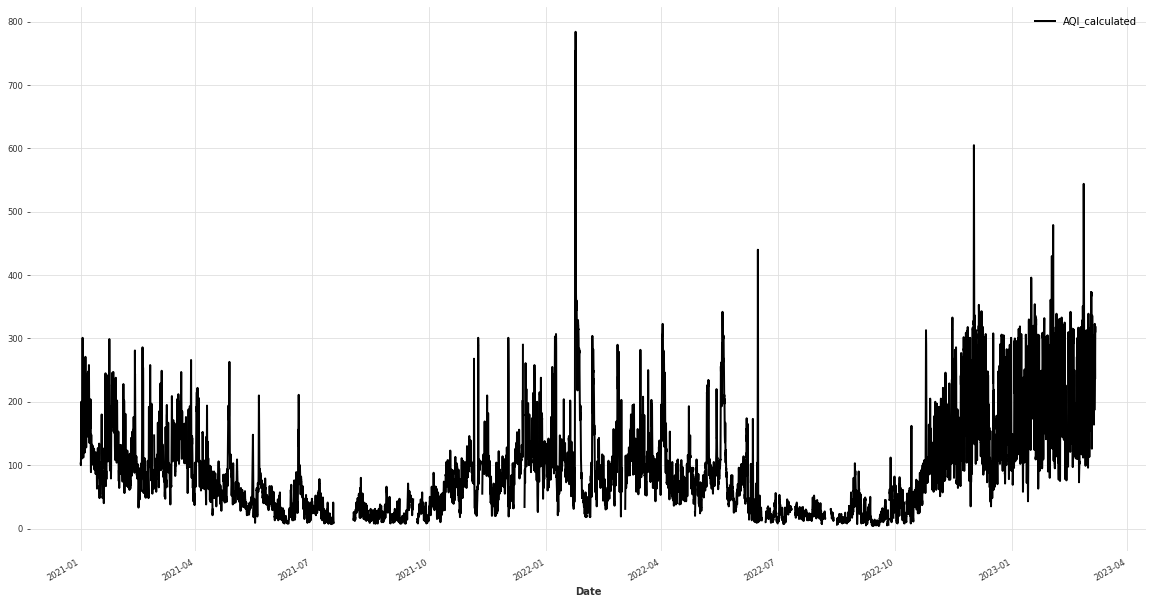

In [ ]:
ts.plot()

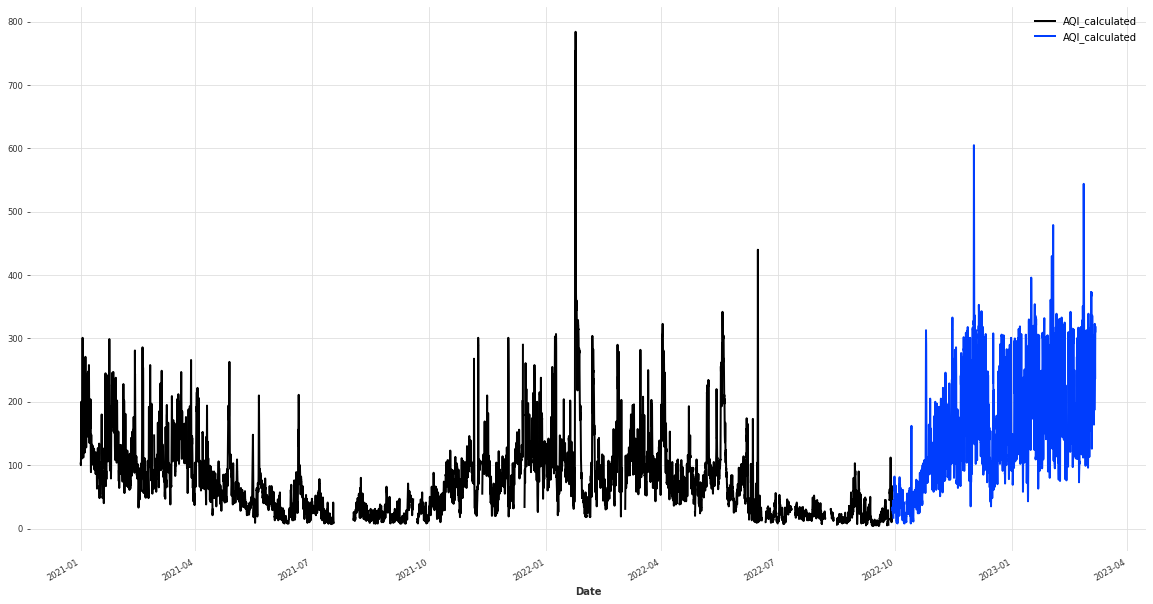

In [ ]:
series1, series2 = ts.split_before(0.80)
series1.plot()
series2.plot()

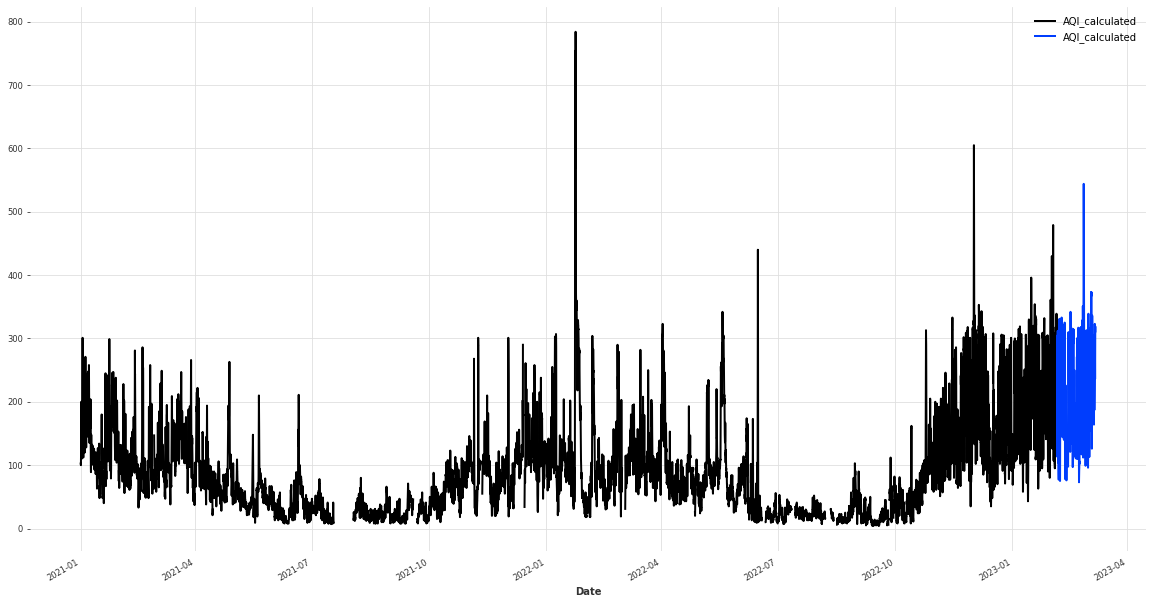

In [ ]:
series1, series2 = ts[:-(96*30)], ts[-(96*30):]
series1.plot()
series2.plot()

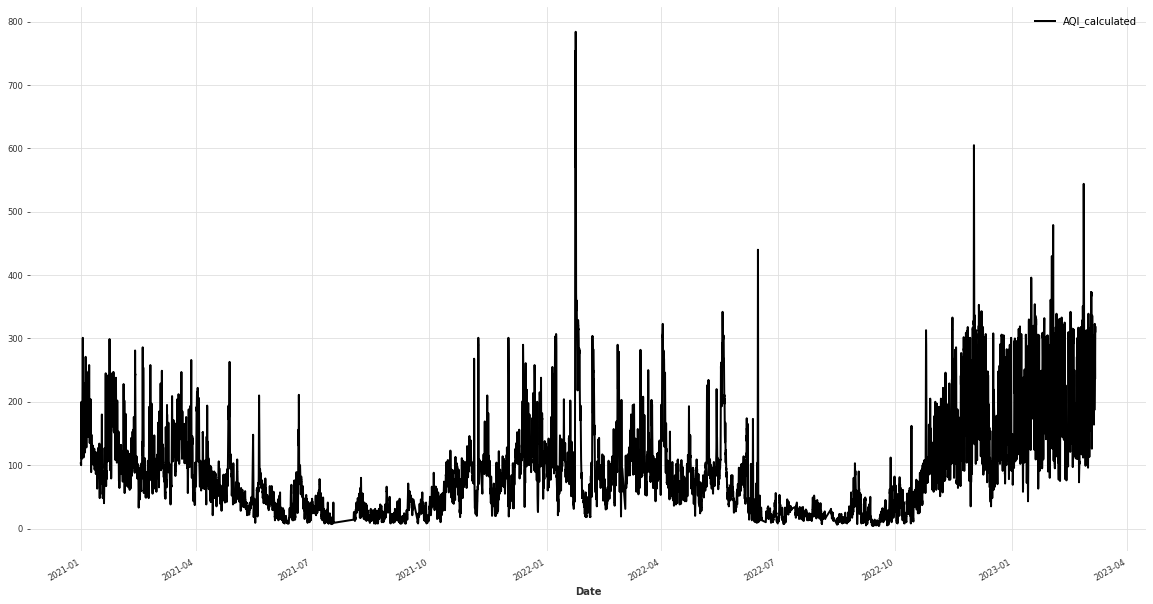

In [ ]:
from darts.utils.missing_values import fill_missing_values
ts = fill_missing_values(ts)
ts.plot()

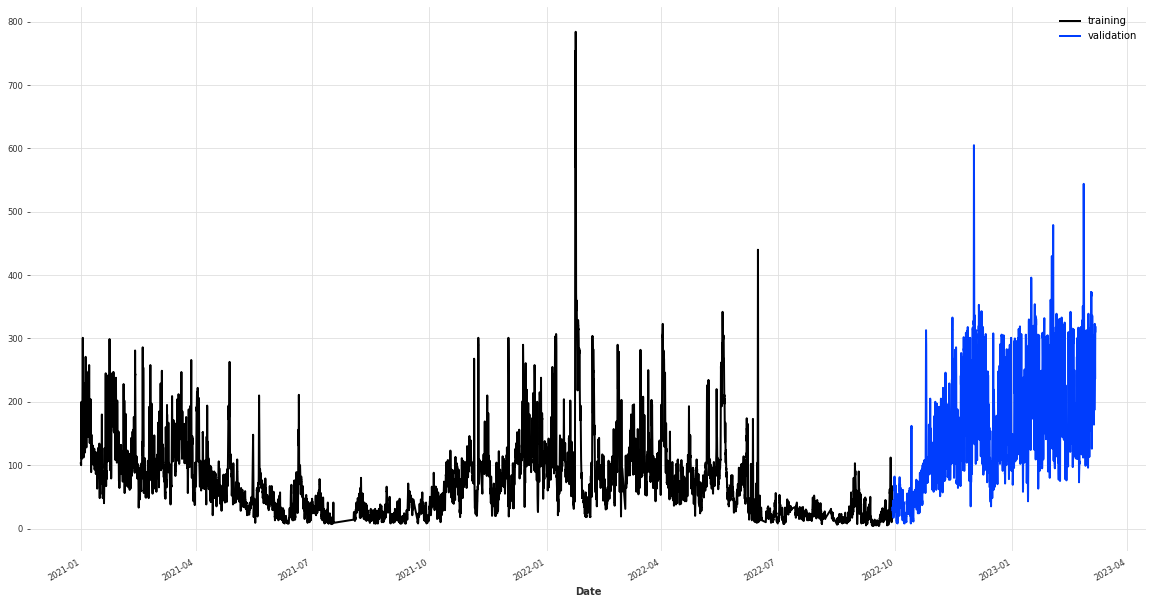

In [ ]:
train, val = ts.split_before(0.80)
train.plot(label="training")
val.plot(label="validation")

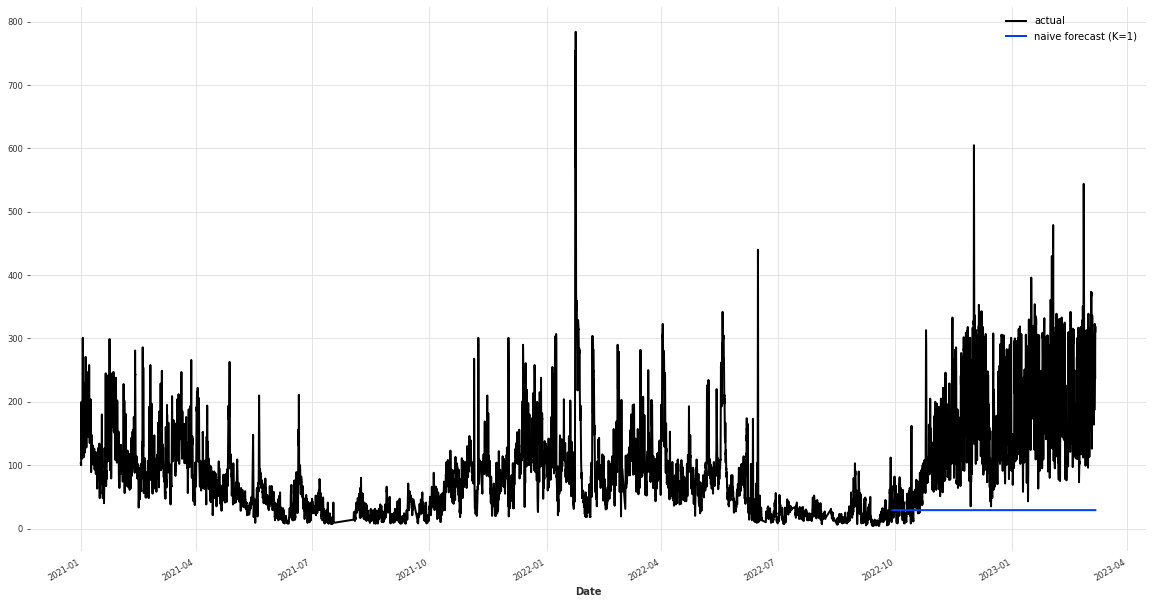

In [ ]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)
naive_forecast = naive_model.predict((int)(0.2*len(ts)))

ts.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=1)")

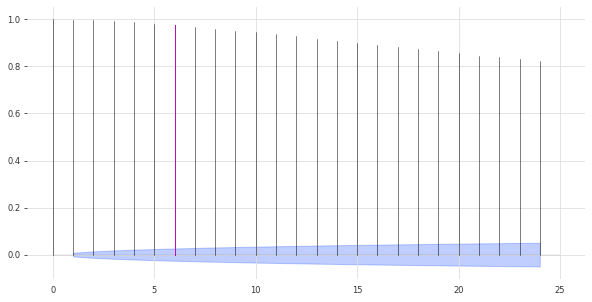

In [ ]:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, m=6, alpha=0.05)


In [ ]:
for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

In [ ]:
from darts.metrics import mape

print(
    "Mean absolute percentage error for the naive forecast: {:.2f}%.".format(
        mape(ts, naive_forecast)
    )
)

Mean absolute percentage error for the naive forecast: 76.60%.


In [ ]:
from darts.models import ExponentialSmoothing
from darts.utils.utils import SeasonalityMode

model = ExponentialSmoothing(seasonal=SeasonalityMode.NONE)
model.fit(train)
forecast = model.predict(len(val))
print("model ExponentialSmoothing obtains MAPE: {:.2f}%".format(mape(val, forecast)))


model ExponentialSmoothing obtains MAPE: 343.20%


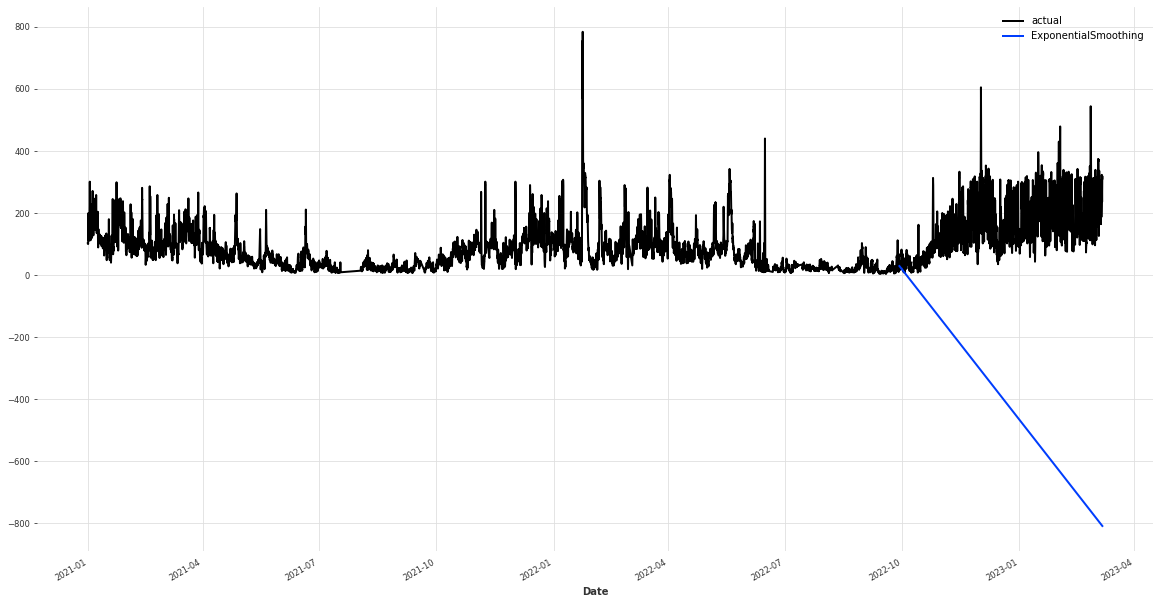

In [ ]:
ts.plot(label="actual")
forecast.plot(label="ExponentialSmoothing")

Analysis with hourly data 

In [ ]:
df_hourly.tail()

,Date,AQI_calculated
19076,2023-03-06 20:00:00,303.50
19077,2023-03-06 21:00:00,302.00
19078,2023-03-06 22:00:00,311.25
19079,2023-03-06 23:00:00,315.50
19080,2023-03-07 00:00:00,310.00


In [ ]:
ts_hourly = TimeSeries.from_dataframe(df=df_hourly, time_col='Date', value_cols= ['AQI_calculated'], fill_missing_dates=True, freq='H')

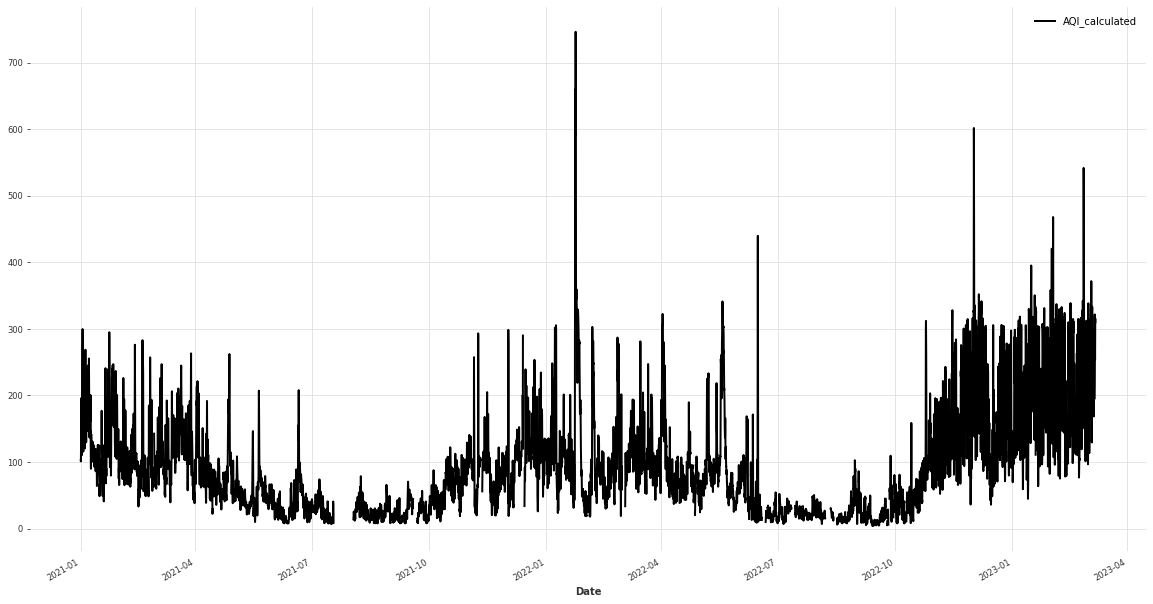

In [ ]:
ts_hourly.plot()

In [ ]:
ts_hourly = fill_missing_values(ts_hourly)

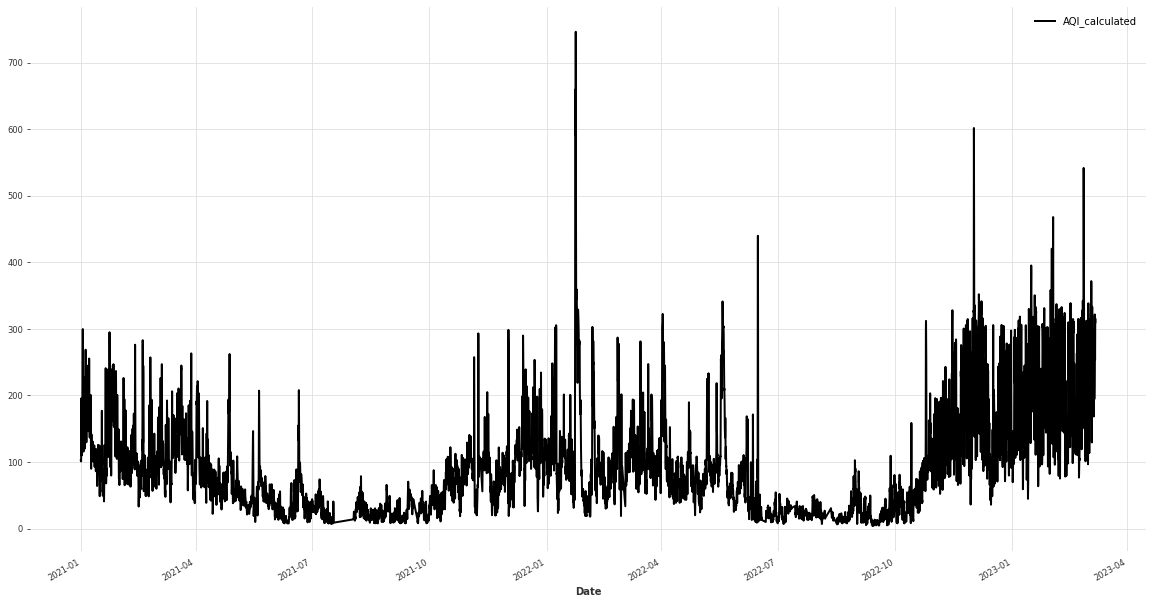

In [ ]:
ts_hourly.plot()

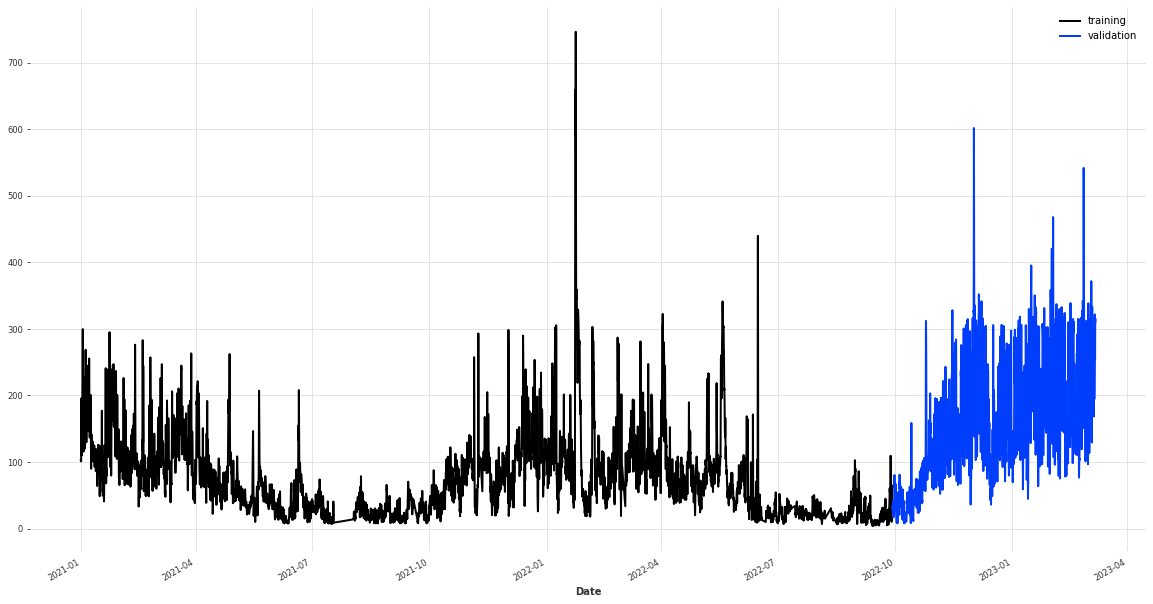

In [ ]:
train_hourly, val_hourly = ts_hourly.split_before(0.80)
train_hourly.plot(label="training")
val_hourly.plot(label="validation")

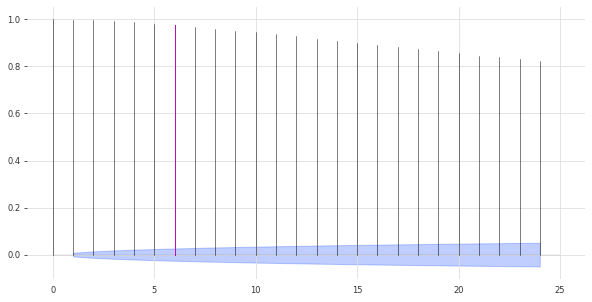

In [ ]:
plot_acf(train, m=6, alpha=0.05)

Still no seasonality

In [ ]:
for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

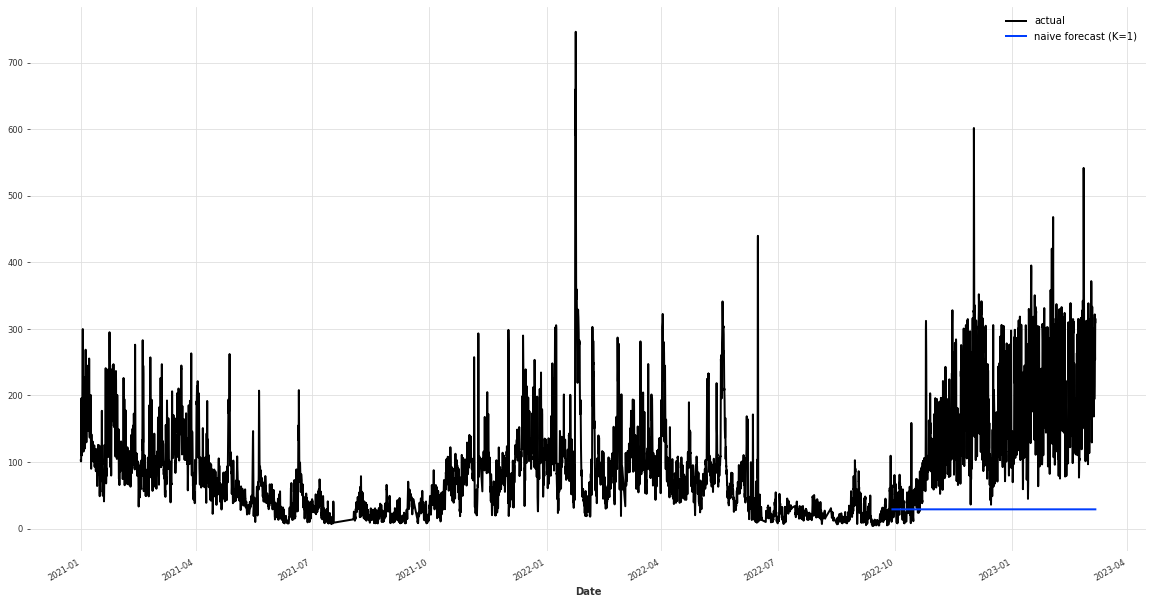

In [ ]:
from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)
naive_model.fit(train_hourly)
naive_forecast = naive_model.predict(len(val_hourly))

ts_hourly.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=1)")

In [ ]:
from darts.models import Prophet

model = Prophet()
model.fit(train_hourly)
prophet_forecast = model.predict(len(val_hourly))


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxnskcsu/g0tf50nl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxnskcsu/togcaicc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24263', 'data', 'file=/tmp/tmpfxnskcsu/g0tf50nl.json', 'init=/tmp/tmpfxnskcsu/togcaicc.json', 'output', 'file=/tmp/tmpfxnskcsu/prophet_model54ek38jc/prophet_model-20230328182827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:28:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:28:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


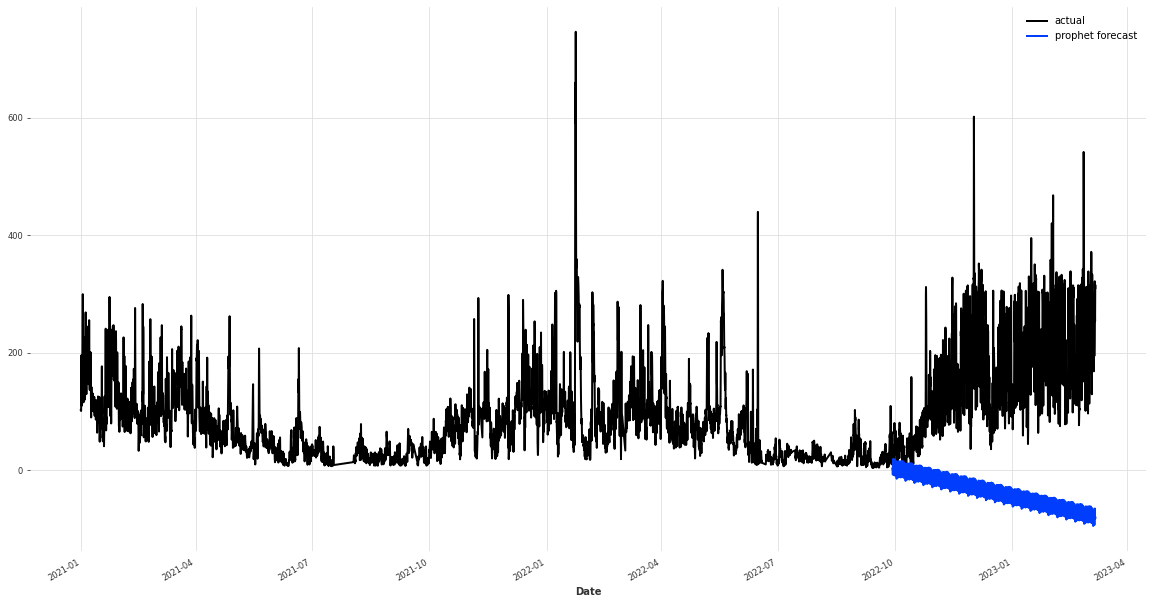

In [ ]:
ts_hourly.plot(label="actual")
prophet_forecast.plot(label="prophet forecast")

Try the Prophet package outside Darts 

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

In [ ]:
#rename column
df_hourly = df_hourly.rename(columns={'Date': 'ds', 'AQI_calculated' : 'y'})

In [ ]:
df_hourly.columns

Index(['ds', 'y'], dtype='object')

In [ ]:
model = Prophet()
model.fit(df_hourly)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxnskcsu/mj7wazwi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfxnskcsu/rdzxpwku.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29548', 'data', 'file=/tmp/tmpfxnskcsu/mj7wazwi.json', 'init=/tmp/tmpfxnskcsu/rdzxpwku.json', 'output', 'file=/tmp/tmpfxnskcsu/prophet_modelrwo90tf9/prophet_model-20230328183251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:33:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=960*2, freq='H', include_history=True)
future.tail()

,ds
20996,2023-05-25 20:00:00
20997,2023-05-25 21:00:00
20998,2023-05-25 22:00:00
20999,2023-05-25 23:00:00
21000,2023-05-26 00:00:00


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
20996,2023-05-25 20:00:00,348.579040,269.000971,419.610130
20997,2023-05-25 21:00:00,349.284176,274.198433,425.806659
20998,2023-05-25 22:00:00,349.690728,280.963821,426.496503
20999,2023-05-25 23:00:00,349.467683,274.598932,424.403163
21000,2023-05-26 00:00:00,348.366301,279.581453,422.282269


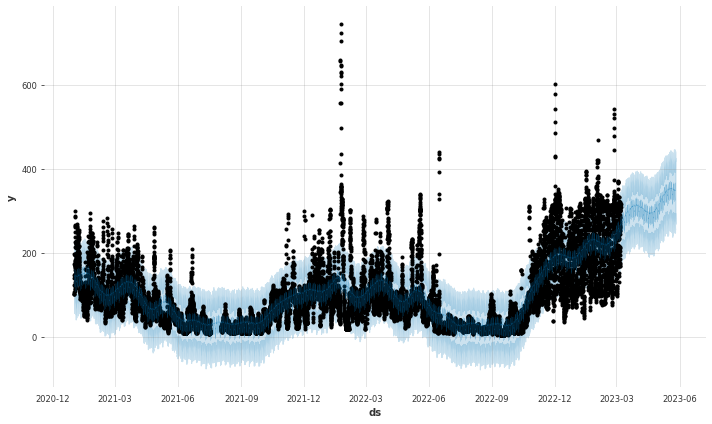

In [ ]:
plt.rcParams['figure.figsize']=(20,10)
fig1 = model.plot(forecast)
